# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [ ]:
import argparse
import os
import time

import PIL
from PIL import Image

import numpy as np
import torchvision
import pickle

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Partie 1 : Architecture VGG16

In [ ]:
#!wget https://github.com/cdancette/deep-learning-polytech-tp6-7/raw/master/tp8/imagenet_classes.pkl
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/imagenet_classes.pkl

# Bonus : Classifiez des exemples avec vgg16 et commentez le résultat dans votre rapport.
!wget --content-disposition https://unsplash.com/photos/gKXKBY-C-Dk/download?force=true -O cat.jpg
!wget --content-disposition https://unsplash.com/photos/qO-PIF84Vxg/download?force=true -O dog.jpg

--2024-12-21 14:52:34--  https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/imagenet_classes.pkl
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/imagenet_classes.pkl [following]
--2024-12-21 14:52:34--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/imagenet_classes.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35454 (35K) [text/plain]
Saving to: ‘imagenet_classes.pkl’

imagenet_classes.pk 100%[===================>]  34.62K  --.-KB/s    in 0.001s  

2024-12-21 14:52:34 (43.8 MB/s) - ‘imagenet_classes.pkl’ saved [3

## Classification of a cat picture iwth VGG16:

Image initialization size: (5026, 3458)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  Egyptian cat


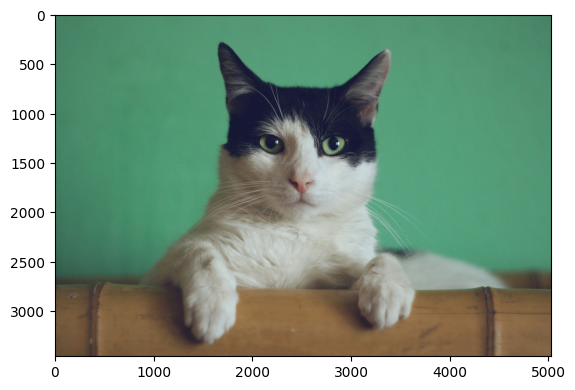

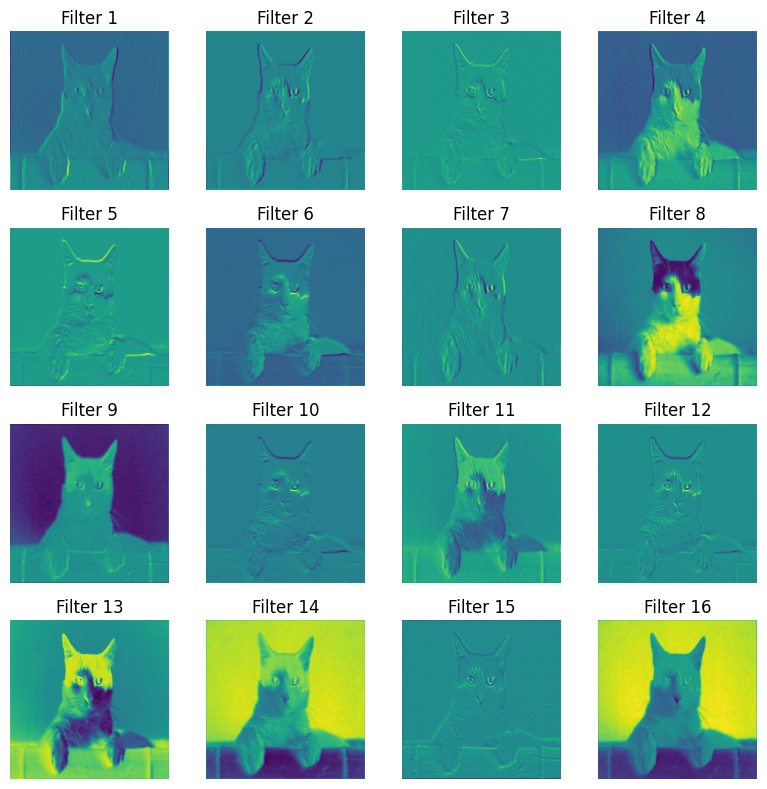

In [ ]:
nameim = "cat"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

## Dog version:

Image initialization size: (5184, 3456)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  Lakeland terrier


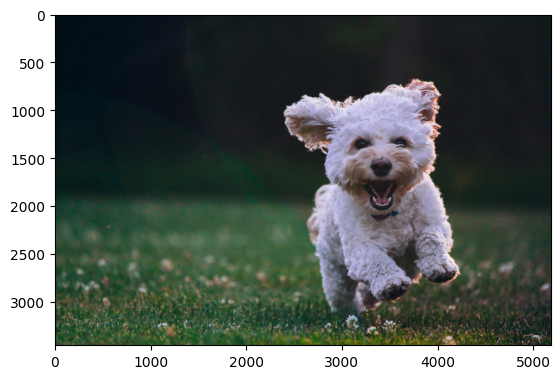

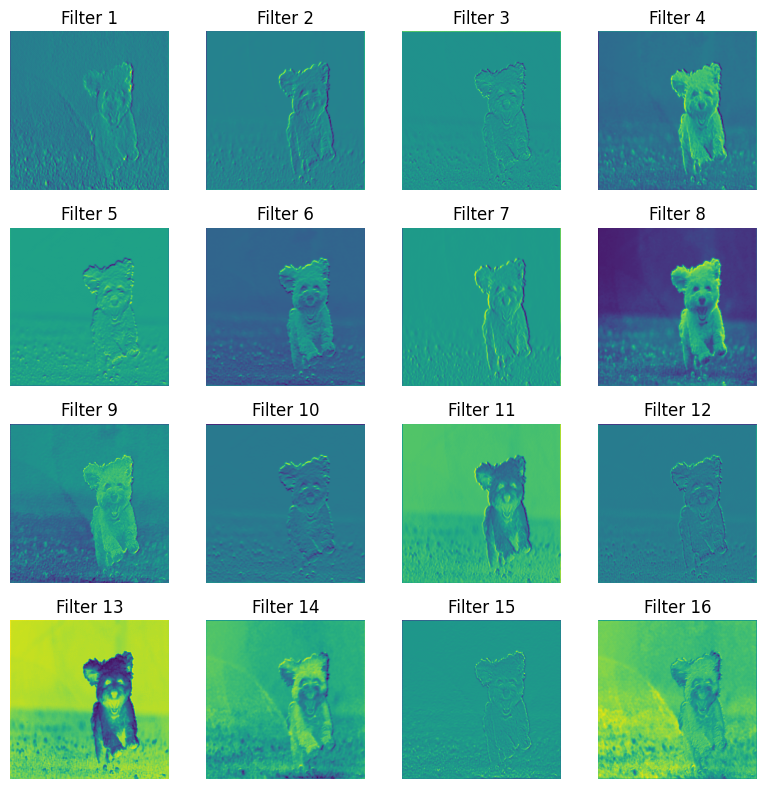

In [ ]:
nameim = "dog"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

Image initialization size: (640, 692)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  king penguin, Aptenodytes patagonica


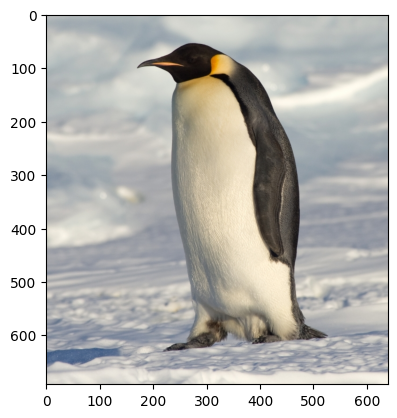

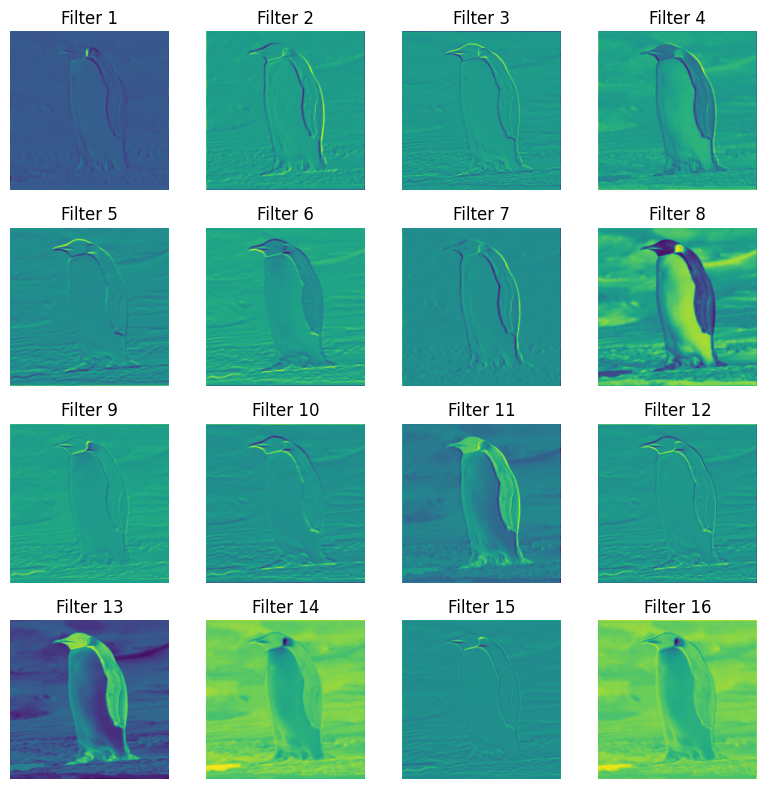

In [ ]:
nameim = "manchot"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

Image initialization size: (1291, 822)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  African elephant, Loxodonta africana


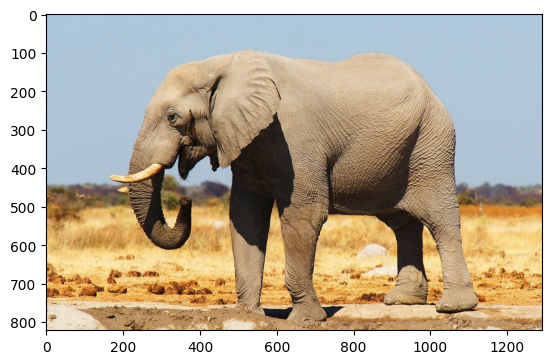

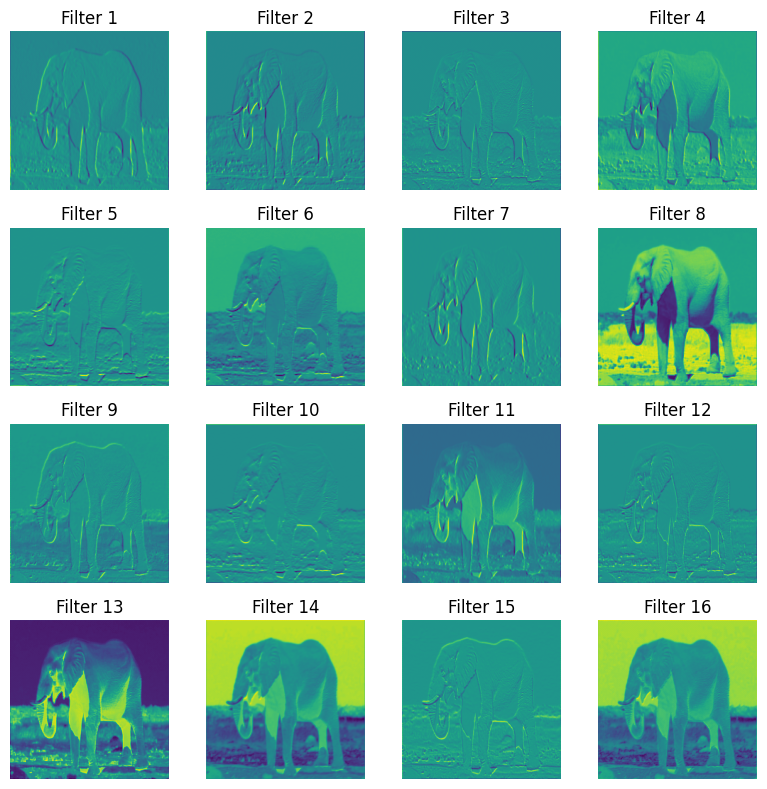

In [ ]:
nameim = "elephant"+".jpeg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

Image initialization size: (2048, 820)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  volcano


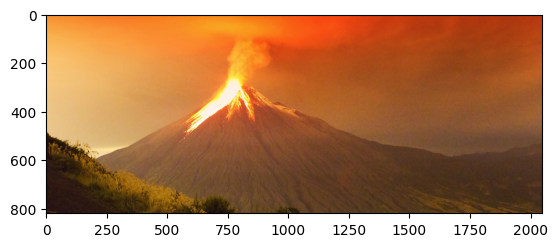

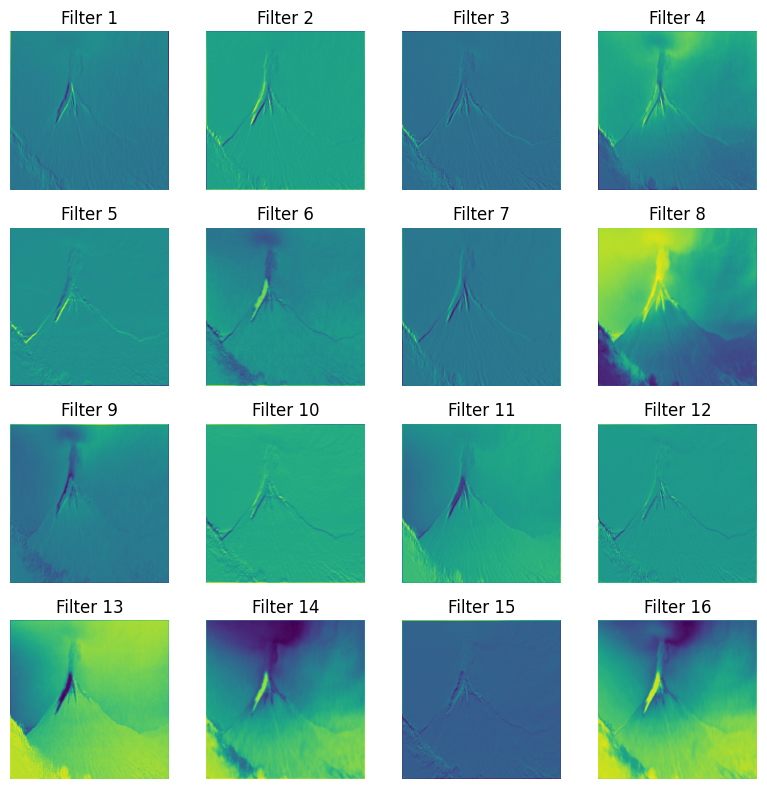

In [ ]:
nameim = "volcano"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

Image initialization size: (1024, 640)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  rifle


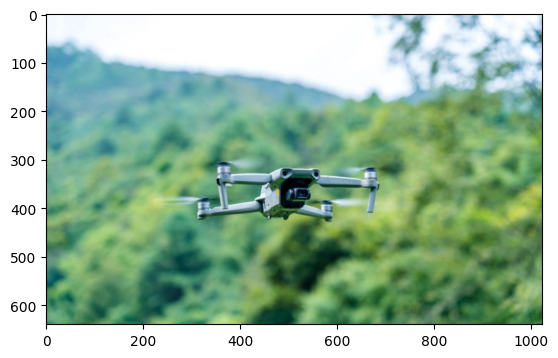

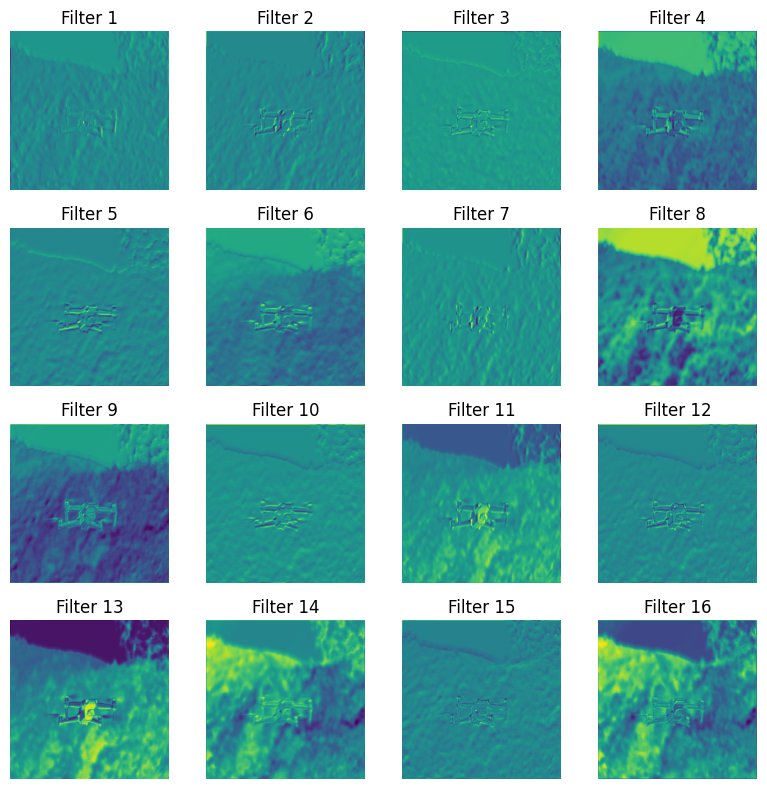

In [ ]:
nameim = "drone"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

Image initialization size: (642, 360)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  Saluki, gazelle hound


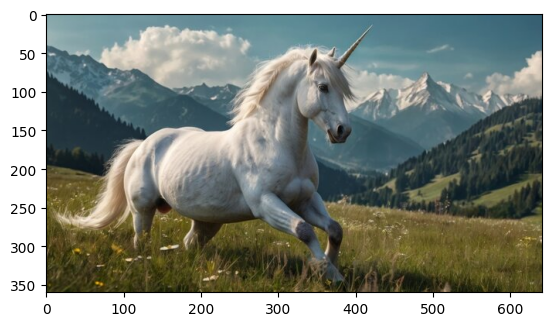

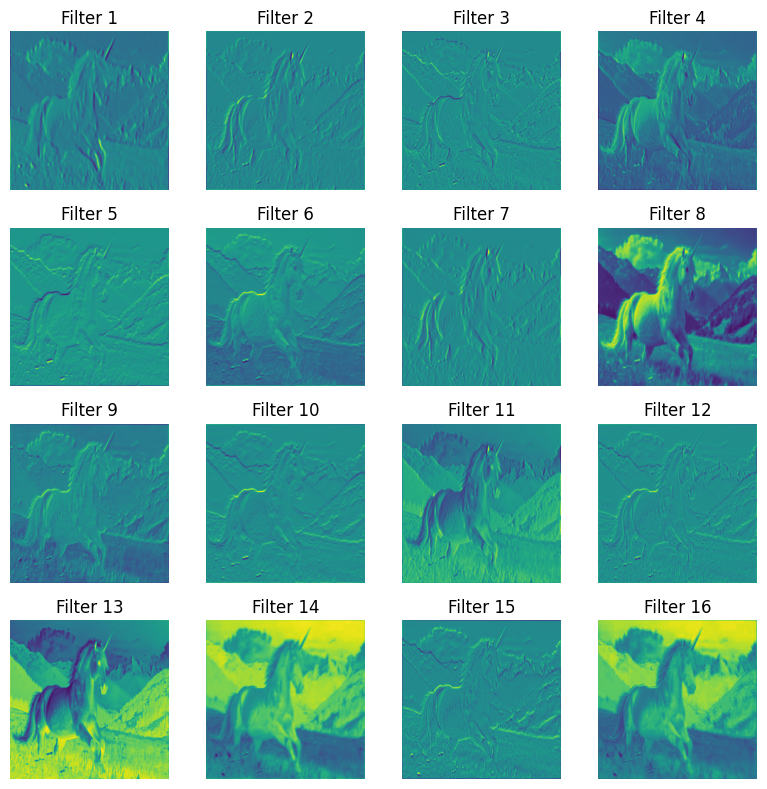

In [ ]:
nameim = "licorne"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

Image initialization size: (1314, 747)

Resized image:  (3, 224, 224)

Image size after normalization:  (3, 224, 224)

Predicted class:  aircraft carrier, carrier, flattop, attack aircraft carrier


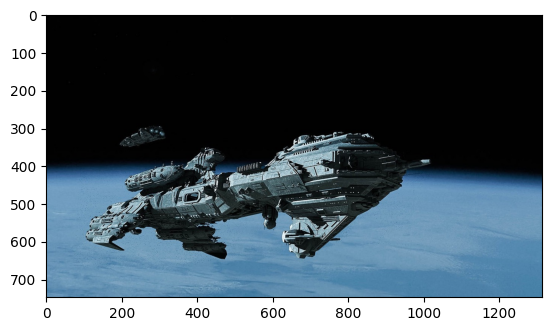

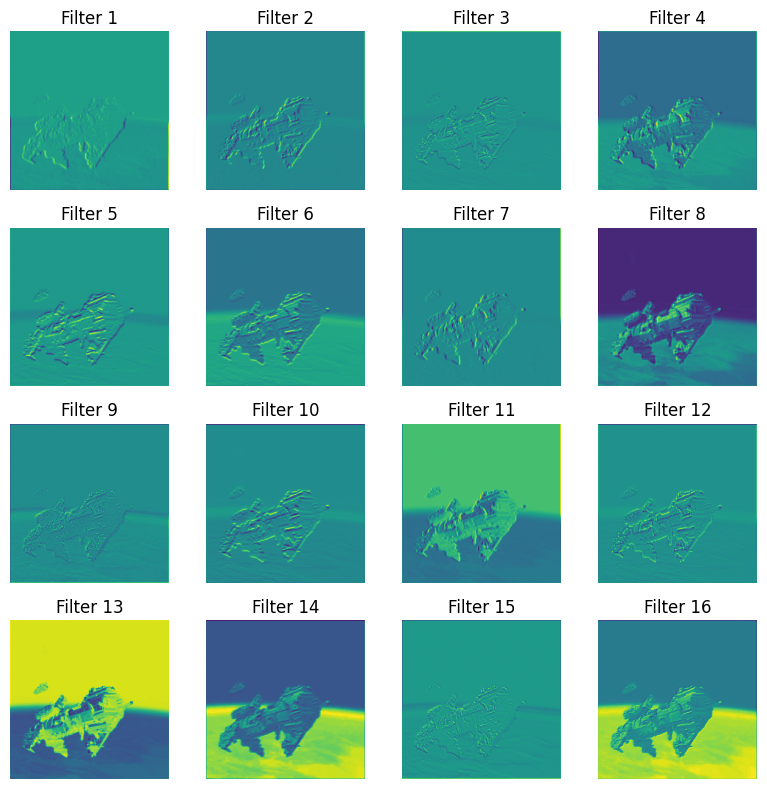

In [ ]:
nameim = "spaceship"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

print("Image initialization size:", img.size)

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))

print("\nResized image: ", img.shape)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = np.resize(mu, (3,224,224))
sigma = np.resize(sigma, (3,224,224))
# compute the normalized image with mean ImageNet image
# img = YOUR CODE HERE
img = img - mu
img = img / sigma

print("\nImage size after normalization: ", img.shape)

# Loding pre-trained VGG
vgg16 = torchvision.models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.eval() # eval mod to not calculate gradients for faster computation

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x) # TODO calcul forward
y = y.squeeze(0).detach().numpy()

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
print("\nPredicted class: ", imagenet_classes[np.argmax(y)])


# first layer
first_conv_layer = vgg16.features[0]

# activation maps
with torch.no_grad():
    activation_maps = first_conv_layer(x)
activation_maps = activation_maps.squeeze(0).detach().cpu().numpy()

# Visualization
num_filters = activation_maps.shape[0]
plt.figure(figsize=(8, 8))

for i in range(min(16, num_filters)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(activation_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.tight_layout()
plt.show()

# Partie 2: Transfer Learning avec VGG16 sur 15 Scene

In [ ]:
#!wget https://github.com/cdancette/deep-learning-polytech-tp6-7/raw/master/tp8/15ScenesData.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/15ScenesData.zip

!unzip 15ScenesData.zip

--2024-12-22 18:25:55--  https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/15ScenesData.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/15ScenesData.zip [following]
--2024-12-22 18:25:55--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/15ScenesData.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86520868 (83M) [application/zip]
Saving to: ‘15ScenesData.zip’

15ScenesData.zip    100%[===================>]  82.51M   395MB/s    in 0.2s    

2024-12-22 18:25:56 (395 MB/s) - ‘15ScenesData.zip’ saved [86520868/86520

In [ ]:
ls 15SceneData/test/bedroom/

image_0003.jpg  image_0035.jpg  image_0068.jpg  image_0103.jpg  image_0141.jpg  image_0182.jpg
image_0004.jpg  image_0037.jpg  image_0069.jpg  image_0104.jpg  image_0142.jpg  image_0189.jpg
image_0006.jpg  image_0039.jpg  image_0071.jpg  image_0112.jpg  image_0144.jpg  image_0190.jpg
image_0007.jpg  image_0040.jpg  image_0073.jpg  image_0113.jpg  image_0148.jpg  image_0191.jpg
image_0008.jpg  image_0042.jpg  image_0074.jpg  image_0114.jpg  image_0150.jpg  image_0192.jpg
image_0011.jpg  image_0043.jpg  image_0077.jpg  image_0115.jpg  image_0152.jpg  image_0195.jpg
image_0013.jpg  image_0047.jpg  image_0080.jpg  image_0117.jpg  image_0153.jpg  image_0196.jpg
image_0014.jpg  image_0049.jpg  image_0081.jpg  image_0118.jpg  image_0156.jpg  image_0200.jpg
image_0016.jpg  image_0050.jpg  image_0082.jpg  image_0119.jpg  image_0157.jpg  image_0202.jpg
image_0017.jpg  image_0052.jpg  image_0084.jpg  image_0120.jpg  image_0158.jpg  image_0203.jpg
image_0018.jpg  image_0053.jpg  image_0086.jpg  im

In [ ]:
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:13<00:00, 40.9MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
class VGG16relu7(nn.Module):
  def __init__(self):
    super(VGG16relu7, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children()))
    # Keep a piece of the classifier: -2 to stop at relu7
    self.classifier = nn.Sequential(*list(vgg16.classifier.children())[:-2])
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x


VGG16relu7()

VGG16relu7(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [ ]:
class VGG16relu6(nn.Module):
  def __init__(self):
    super(VGG16relu6, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children()))
    # Keep a piece of the classifier: -5 to stop at relu6
    self.classifier = nn.Sequential(*list(vgg16.classifier.children())[:-5])
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

VGG16relu6()

VGG16relu6(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [ ]:
class VGG16bloc5(nn.Module):
  def __init__(self):
    super(VGG16bloc5, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children()))
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    return x

VGG16bloc5()

VGG16bloc5(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [ ]:
class VGG16bloc4(nn.Module):
  def __init__(self):
    super(VGG16bloc4, self).__init__()
    # Copy the entire convolutional part
    self.features = nn.Sequential( *list(vgg16.features.children())[:-7])
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    return x

VGG16bloc4()

VGG16bloc4(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [ ]:
PRINT_INTERVAL = 50
CUDA = True

def get_dataset(batch_size, path):

    # This function expands 3 times a gray level image
    # to transform it into an image RGB. Use it with transform.Lambda
    def duplicateChannel(img):
        img = img.convert('L')
        np_img = np.array(img, dtype=np.uint8)
        np_img = np.dstack([np_img, np_img, np_img])
        img = Image.fromarray(np_img, 'RGB')
        return img
    def resizeImage(img):
      return img.resize((224,224), Image.BILINEAR)
    def toTensor(img):
      return torch.Tensor(img)


    #####################
    ## YOUR CODE HERE  ##
    #####################
    train_transform = transforms.Compose([
        transforms.Lambda(duplicateChannel),
        transforms.Resize((224, 224), interpolation=Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transform = transforms.Compose([
        transforms.Lambda(duplicateChannel),
        transforms.Resize((224, 224), interpolation=Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset = datasets.ImageFolder(path + '/train', transform=train_transform)
    val_dataset = datasets.ImageFolder(path + '/test', transform=val_transform)
    ####################
    ##      END        #
    ####################

    train_loader = torch.utils.data.DataLoader(train_dataset,
                        batch_size=batch_size, shuffle=False, pin_memory=CUDA, num_workers=2)
    val_loader = torch.utils.data.DataLoader(val_dataset,
                        batch_size=batch_size, shuffle=False, pin_memory=CUDA, num_workers=2)

    return train_loader, val_loader

In [ ]:
train, test = get_dataset(path="15SceneData", batch_size=8)

print((next(iter(train)))[0].shape, (next(iter(train)))[1].shape)

model = VGG16relu7()
model.eval()
for i, (input, target) in enumerate(train):
  if i % PRINT_INTERVAL == 0:
      print('Batch {0:03d}/{1:03d}'.format(i, len(train)))

  if CUDA:
      input = input.cuda()
      model = model.cuda()
  # Extraire les caractéristiques du batch courant
  features = model(input)
  print(features.shape)
  break

torch.Size([8, 3, 224, 224]) torch.Size([8])
Batch 000/188
torch.Size([8, 4096])


In [ ]:
def extract_features(data, model):
    #####################
    ## YOUR CODE HERE  ##
    #####################

    num_samples = len(data.dataset)

    #####################
    ##      END        ##
    #####################

    # Désactiver les gradients pour économiser la mémoire
    model.eval()
    with torch.no_grad():
        start_idx = 0
        for i, (input, target) in enumerate(data):
            if i % PRINT_INTERVAL == 0:
                print('Batch {0:03d}/{1:03d}'.format(i, len(data)))

            if CUDA:
                input = input.cuda()

            # Extraire les caractéristiques du batch courant
            features = model(input)
            batch_size = input.size(0)

            if i == 0:
              X = torch.zeros((num_samples, features.shape[1])).cpu().numpy()
              y = torch.zeros(num_samples, dtype=torch.long).cpu().numpy()

            # Stocker les caractéristiques et les étiquettes dans les matrices pré-allouées
            X[start_idx:start_idx + batch_size] = features.cpu().numpy()
            y[start_idx:start_idx + batch_size] = target.cpu().numpy()

            start_idx += batch_size

    X = X / np.linalg.norm(X, axis=1, keepdims=True)

    return X, y

In [ ]:
def main(model, path="15SceneData", batch_size=8):

    #####################
    ## YOUR CODE HERE  ##
    #####################
    model = model
    ####################
    ##      END        #
    ####################

    model.eval()
    if CUDA: # si on fait du GPU, passage en CUDA
        cudnn.benchmark = True
        model = model.cuda()

    print('Récupération des données')
    train, test = get_dataset(batch_size, path)

    print('Feature extraction')
    X_train, y_train = extract_features(train, model)
    X_test, y_test = extract_features(test, model)
    print("dimension des features: ", X_train[0].shape)
    #####################
    ## Votre code ici  ##
    #####################
    print('Apprentissage des SVM')
    svm = LinearSVC(C=1.0, random_state=0, max_iter=2000)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ####################
    ##      FIN        #
    ####################
    print('Accuracy = %f' % accuracy)

## Full network version

In [ ]:
model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
main(model, "15SceneData", 8)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (1000,)
Apprentissage des SVM
Accuracy = 0.869682


## VGG16relu7

In [ ]:
model = VGG16relu7()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy = 0.888107


## VGG16relu6 version

In [ ]:
model = VGG16relu6()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy = 0.906868


## VGG16bloc5 version

In [ ]:
model = VGG16bloc5()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (25088,)
Apprentissage des SVM
Accuracy = 0.899832


## VGG16bloc4 version

In [ ]:
model = VGG16bloc4()
main(model, "15SceneData", 8)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (100352,)
Apprentissage des SVM
Accuracy = 0.886767


In [ ]:
def main2(model, path="15SceneData", batch_size=8, C=[1]):

    #####################
    ## YOUR CODE HERE  ##
    #####################
    model = model
    ####################
    ##      END        #
    ####################

    model.eval()
    if CUDA: # si on fait du GPU, passage en CUDA
        cudnn.benchmark = True
        model = model.cuda()

    print('Récupération des données')
    train, test = get_dataset(batch_size, path)

    print('Feature extraction')
    X_train, y_train = extract_features(train, model)
    X_test, y_test = extract_features(test, model)
    print("dimension des features: ", X_train[0].shape)
    #####################
    ## Votre code ici  ##
    #####################
    print('Apprentissage des SVM')
    for c in C:
      svm = LinearSVC(C=c, random_state=0, max_iter=2000)
      svm.fit(X_train, y_train)

      y_pred = svm.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      ####################
      ##      FIN        #
      ####################
      print(f'Accuracy C={c}: {accuracy}')

#Optimisation de C

##VGG16relu6

In [ ]:
C = [0.01, 0.1, 1, 10, 100]
model = VGG16relu6()
main2(model, "15SceneData", 8, C)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy C=0.01: 0.8576214405360134
Accuracy C=0.1: 0.8891122278056951
Accuracy C=1: 0.9068676716917923
Accuracy C=10: 0.9068676716917923
Accuracy C=100: 0.9041876046901173


In [ ]:
C = [2, 4, 6, 8, 10]
model = VGG16relu6()
main2(model, "15SceneData", 8, C)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy C=2: 0.9078726968174204
Accuracy C=4: 0.9078726968174204
Accuracy C=6: 0.9082077051926298
Accuracy C=8: 0.9068676716917923
Accuracy C=10: 0.9068676716917923


In [ ]:
C = [4, 5, 6, 7, 8]
model = VGG16relu6()
main2(model, "15SceneData", 8, C)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy C=4: 0.9078726968174204
Accuracy C=5: 0.9082077051926298
Accuracy C=6: 0.9082077051926298
Accuracy C=7: 0.9078726968174204
Accuracy C=8: 0.9068676716917923


In [ ]:
C = np.linspace(5, 6, 10)
model = VGG16relu6()
main2(model, "15SceneData", 8, C)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (4096,)
Apprentissage des SVM
Accuracy C=5.0: 0.9082077051926298
Accuracy C=5.111111111111111: 0.9082077051926298
Accuracy C=5.222222222222222: 0.9088777219430486
Accuracy C=5.333333333333333: 0.9088777219430486
Accuracy C=5.444444444444445: 0.9085427135678392
Accuracy C=5.555555555555555: 0.9085427135678392
Accuracy C=5.666666666666667: 0.9085427135678392
Accuracy C=5.777777777777778: 0.9085427135678392
Accuracy C=5.888888888888889: 0.9082077051926298
Accuracy C=6.0: 0.9082077051926298


##VGG16bloc5

In [ ]:
C = [0.01, 0.1, 1, 10, 100]
model = VGG16bloc5()
main2(model, "15SceneData", 8, C)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (25088,)
Apprentissage des SVM
Accuracy C=0.01: 0.8428810720268006
Accuracy C=0.1: 0.8763819095477386
Accuracy C=1: 0.8998324958123953
Accuracy C=10: 0.9031825795644891
Accuracy C=100: 0.9015075376884422


In [ ]:
C = [2, 4, 6, 8, 10, 20, 40, 60, 80, 100]
model = VGG16bloc5()
main2(model, "15SceneData", 8, C)

Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
dimension des features:  (25088,)
Apprentissage des SVM
Accuracy C=2: 0.9021775544388609
Accuracy C=4: 0.9028475711892797
Accuracy C=6: 0.9031825795644891
Accuracy C=8: 0.9031825795644891
Accuracy C=10: 0.9031825795644891
Accuracy C=20: 0.9028475711892797
Accuracy C=40: 0.9018425460636516
Accuracy C=60: 0.9015075376884422
Accuracy C=80: 0.9015075376884422
Accuracy C=100: 0.9015075376884422
